--- The purpose of this notebook is to show how to build a multiple linear regression model using python.

--- In our regression analysis we will try to predict the value of housing price (outcome) based on several predictors variables.

--- I am using a simple dataset from kaggle

--- The data contains the variables

-price -area -bedrooms -bathrooms -stories -mainroad -guestroom -basement -hotwaterheating -airconditioning -parking -prefarea -furnishingstatus


In [1]:
## import libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler,OrdinalEncoder,LabelEncoder
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
from scipy import stats
import statsmodels
from statsmodels.stats.stattools import durbin_watson
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
import math
from statsmodels.graphics.regressionplots import *

In [2]:
#import our data using pandas 
data = pd.read_csv("Housing.csv")

We check the first and  last five rows of the dataset.

In [3]:
data.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
data.tail(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [5]:
data.shape

(545, 13)

We have 545 rows and 13 columns

Now lets check about the basic information of the dataset

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


So, our dataset contains five hundred and forty five observations ( 545 ) and thirteen ( 13 ) variables where price will be the depedent variable that we want to predict and the  other twelve ( 12 ) variables consists our candidate predictor variables. Also it's important for the analysis below to notice that five ( 5 ) of thirteen ( 13 ) variables are numerical and all the others are as type object and we need to convert them.


Data cleaning

In [7]:
# Null values
data.isnull().sum()
# Also you can use data.isnull().any()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [8]:
# another way to check abou empty strings . if a string element is empty returns False
data.astype(bool).sum()

price               545
area                545
bedrooms            545
bathrooms           545
stories             545
mainroad            545
guestroom           545
basement            545
hotwaterheating     545
airconditioning     545
parking             246
prefarea            545
furnishingstatus    545
dtype: int64

Also we need to see if some of the numerical variables are negative

In [9]:
columns = data.columns.values
columns 

array(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'], dtype=object)

In [10]:
def get_positive_columns(data):
 for col_name in data.columns.values :
       if data[col_name].dtype.name == 'int64':
            if data[data[col_name]<0].empty==True :
                print(col_name,': positive column')
            else:
                print(col_name,' : negative column')

In [11]:
get_positive_columns(data)

price : positive column
area : positive column
bedrooms : positive column
bathrooms : positive column
stories : positive column
parking : positive column


We can examine if these columns contain negative values from their histograms or boxplots, something that we will see below

Lets explore our dataset. We start with the variable that we want to predict


In [12]:
#descriptive statistics summary
data['price'].describe()

count    5.450000e+02
mean     4.766729e+06
std      1.870440e+06
min      1.750000e+06
25%      3.430000e+06
50%      4.340000e+06
75%      5.740000e+06
max      1.330000e+07
Name: price, dtype: float64

Data visualization

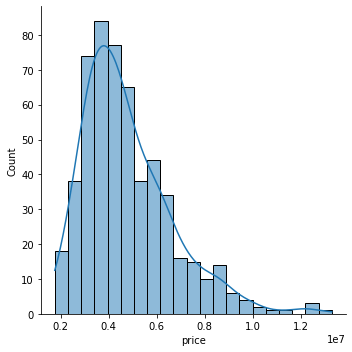

In [13]:
sns.displot(data['price'],kde=True)

In [14]:
#skewness and kurtosis
print("Skewness: %f" % data['price'].skew())
print("Kurtosis: %f" % data['price'].kurt())

Skewness: 1.212239
Kurtosis: 1.960130


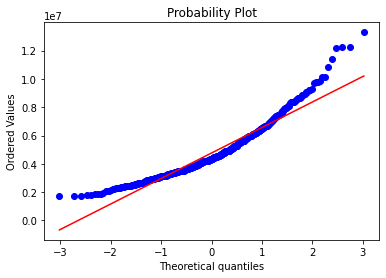

In [15]:
fig = plt.figure()
res = stats.probplot(data['price'], plot=plt)

Skewness: 1.212239
Kurtosis: 1.960130

We notice that the distribution of price variable  deviates significantly from the normal distribution. Something that we can see from the skewness and kurtosis values. We continue our analysis with the relation between the depedent variable price and the predictors variables.

In [16]:
data['area'].describe()

count      545.000000
mean      5150.541284
std       2170.141023
min       1650.000000
25%       3600.000000
50%       4600.000000
75%       6360.000000
max      16200.000000
Name: area, dtype: float64

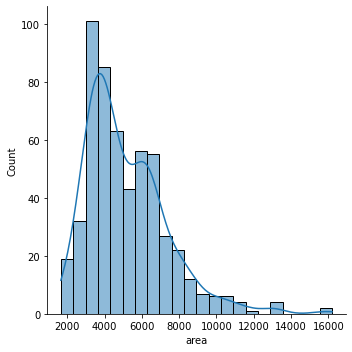

In [17]:
sns.displot(data['area'],kde=True)

In [18]:
#skewness and kurtosis
print("Skewness: %f" % data['area'].skew())
print("Kurtosis: %f" % data['area'].kurt())

Skewness: 1.321188
Kurtosis: 2.751480


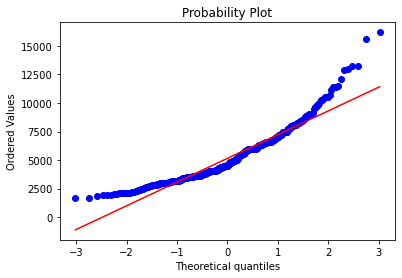

In [19]:
fig = plt.figure()
res = stats.probplot(data['area'], plot=plt)

Skewness: 1.321188
Kurtosis: 2.751480

We notice that the distribution of area variable  deviates significantly from the normal distribution. Something that we can see from the skewness and kurtosis values. We continue our analysis with the relation between the depedent variable price and the predictors variables.

<AxesSubplot:xlabel='area', ylabel='price'>

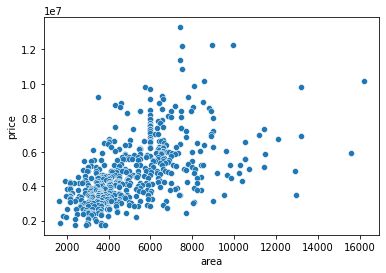

In [20]:
sns.scatterplot(data=data, x="area", y="price")

We see that weight and height are highly dependent on each other,as height increases , weight also increases. Recall that one of the assumptions of linear regression is “homoscedasticity”, i.e. that variance is constant among for all independent variables . From the above scatter is obvious that the variance of the residual term in a regression model varies widely . As a result, we  face the problem of Heteroskedastic and we could say that $$ V(ε_{i}) = σ^{2}x_{i}^{2} $$

Relation between price and the other predictors

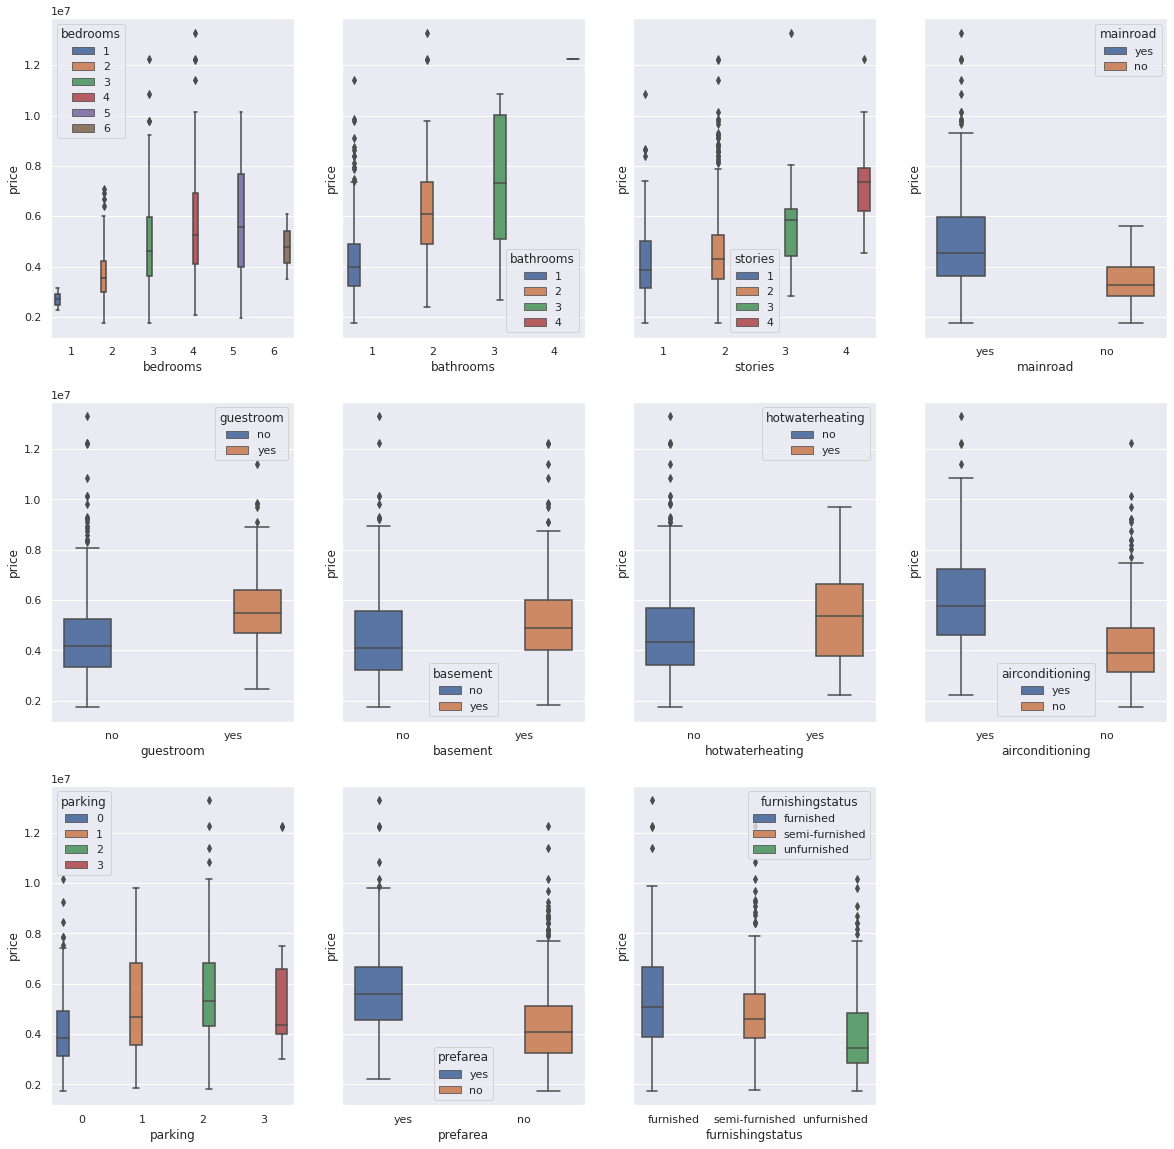

In [21]:
sns.set()
fig, axes = plt.subplots(3, 4,figsize=(20,20),sharey=True)



sns.boxplot(data=data, x='bedrooms', y='price', hue='bedrooms',  ax=axes[0,0])
sns.boxplot(data=data, x='bathrooms', y='price',hue='bathrooms', ax=axes[0,1])
sns.boxplot(data=data, x='stories', y='price',hue='stories', ax=axes[0,2])
sns.boxplot(data=data, x='mainroad', y='price',hue='mainroad', ax=axes[0,3])
sns.boxplot(data=data, x='guestroom', y='price',hue='guestroom', ax=axes[1,0])
sns.boxplot(data=data, x='basement', y='price',hue='basement', ax=axes[1,1])
sns.boxplot(data=data, x='hotwaterheating', y='price',hue='hotwaterheating', ax=axes[1,2])
sns.boxplot(data=data, x='airconditioning', y='price',hue='airconditioning',  ax=axes[1,3])
sns.boxplot(data=data, x='parking', y='price',hue='parking', ax=axes[2,0])
sns.boxplot(data=data, x='prefarea', y='price',hue= 'prefarea',ax=axes[2,1])
sns.boxplot(data=data, x='furnishingstatus', y='price',hue='furnishingstatus', ax=axes[2,2])
axes[2][3].set_visible(False)

The above boxplots show us the relation between the variable price and the other other variables except the area where in this case we use the scatter plot. We notice that we have only one assignment when the house has 4 bathrooms ( check the boxplot of the bathrooms) as the result this assignment does not contribute in our analysis so we decide to remove this. All predictors seem to have  influence on the price.

In [22]:
data[data['bathrooms']==4]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished


In [23]:
data=data.drop([1])


Let's vizualizate the way that each feature is separated among its sub classes.For example , from the first plot the 55% of bedrooms contain three bed ,the 25% of bedrooms contain two bed,the 17% of bedrooms contain four etc.

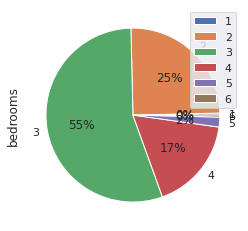

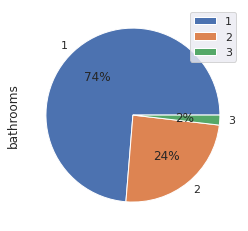

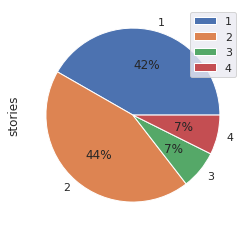

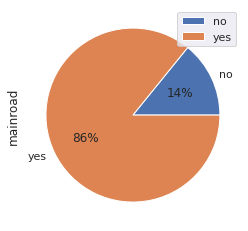

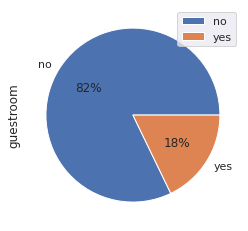

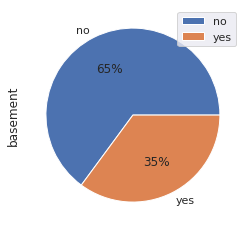

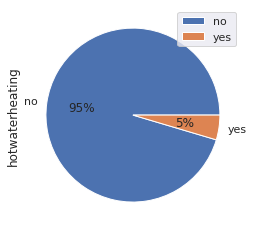

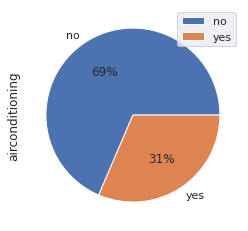

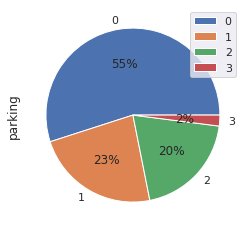

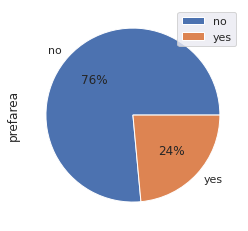

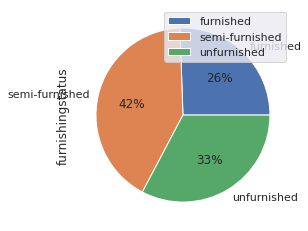

In [24]:
def pie(dataframe,column):
    dataframe = pd.DataFrame({column: data.groupby([column]).count().iloc[:,1] }, index=data.groupby([column]).count().index)
    dataframe.plot(kind='pie',subplots=True, autopct='%1.0f%%')

columns = data.drop(columns=['price','area']).columns
columns
for column in columns:
    pie(data,column)

Relation between the other variables.

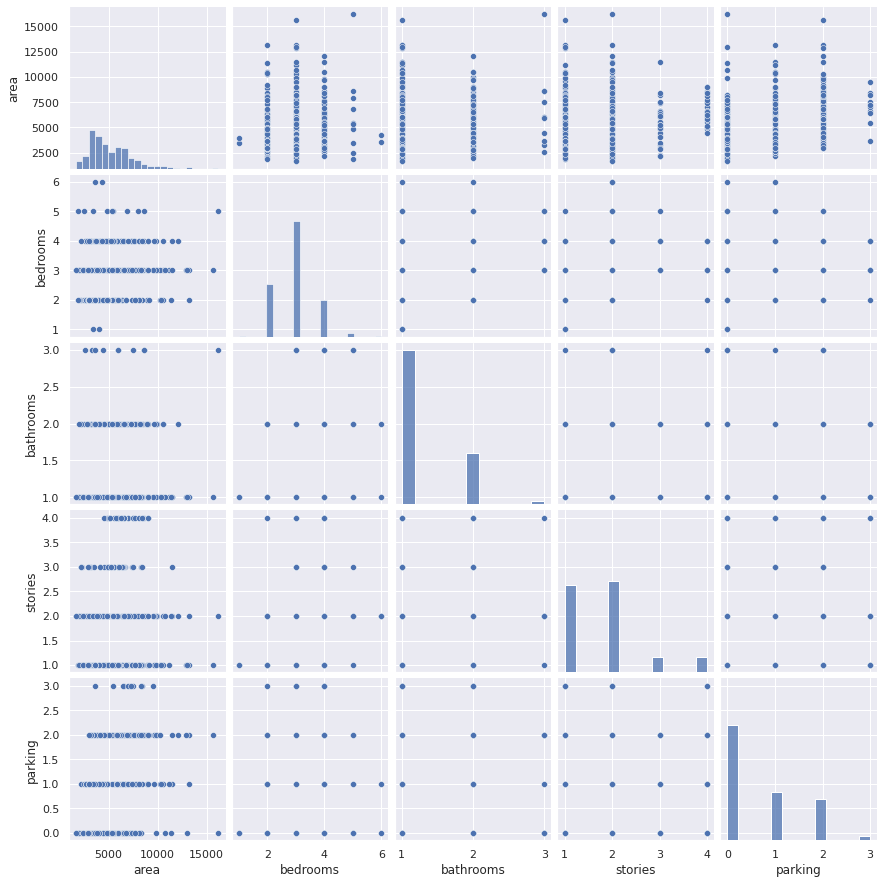

In [25]:
sns.set()
col = data.drop(columns = ['price']).columns.values
sns.pairplot(data[col])
plt.show();

Scatter plots between area and price for  each feature.

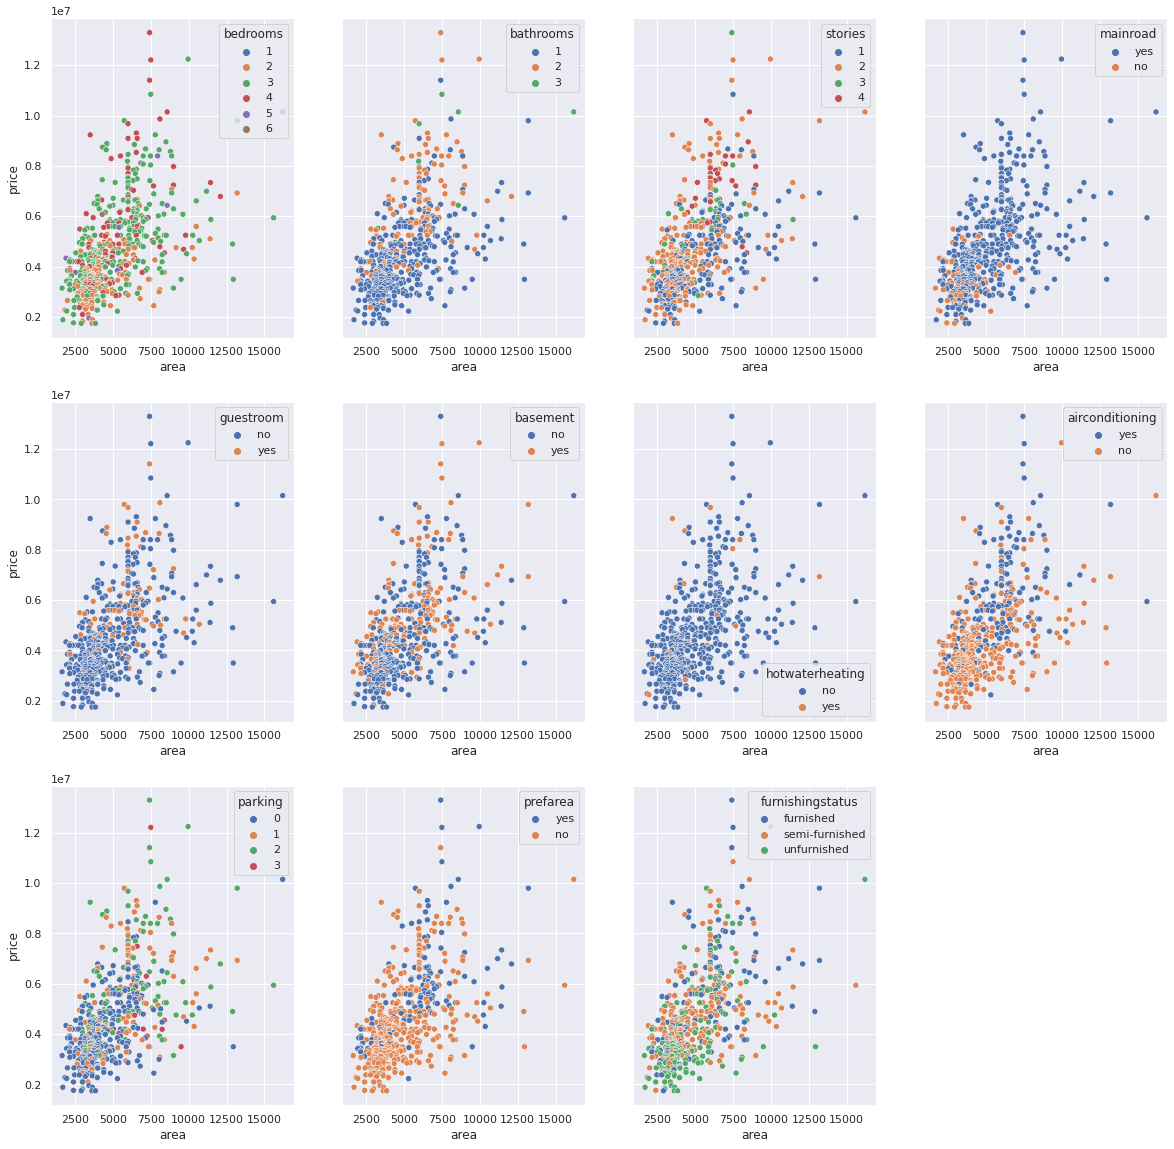

In [26]:
sns.set()
fig, axes = plt.subplots(3, 4,figsize=(20,20),sharey=True)



sns.scatterplot(data=data, x='area', y='price', hue='bedrooms',palette="deep",  ax=axes[0,0])
sns.scatterplot(data=data, x='area', y='price',hue='bathrooms',palette="deep", ax=axes[0,1])
sns.scatterplot(data=data, x='area', y='price',hue='stories',palette="deep", ax=axes[0,2])
sns.scatterplot(data=data, x='area', y='price',hue='mainroad',palette="deep", ax=axes[0,3])
sns.scatterplot(data=data, x='area', y='price',hue='guestroom',palette="deep", ax=axes[1,0])
sns.scatterplot(data=data, x='area', y='price',hue='basement',palette="deep", ax=axes[1,1])
sns.scatterplot(data=data, x='area', y='price',hue='hotwaterheating',palette="deep", ax=axes[1,2])
sns.scatterplot(data=data, x='area', y='price',hue='airconditioning',palette="deep",  ax=axes[1,3])
sns.scatterplot(data=data, x='area', y='price',hue='parking',palette="deep", ax=axes[2,0])
sns.scatterplot(data=data, x='area', y='price',hue= 'prefarea',palette="deep",ax=axes[2,1])
sns.scatterplot(data=data, x='area', y='price',hue='furnishingstatus',palette="deep", ax=axes[2,2])
axes[2][3].set_visible(False)

Outlier Analysis

From the scatterplot between area and price , we notice some outliers  but we don't remove them from the data.

Correlation analysis

In [27]:
# We create a copy dataframe data1 and we encode the dataset for Correlation analysis
lab = LabelEncoder()
data1 = data 

def encoder(data):
    for column in data.columns:
        if data[column].dtype.name == 'object':
            data[column] = lab.fit_transform(data1[column])
encoder(data1)                                           
print(data1)

        price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0    13300000  7420         4          2        3         1          0   
2    12250000  9960         3          2        2         1          0   
3    12215000  7500         4          2        2         1          0   
4    11410000  7420         4          1        2         1          1   
5    10850000  7500         3          3        1         1          0   
..        ...   ...       ...        ...      ...       ...        ...   
540   1820000  3000         2          1        1         1          0   
541   1767150  2400         3          1        1         0          0   
542   1750000  3620         2          1        1         1          0   
543   1750000  2910         3          1        1         0          0   
544   1750000  3850         3          1        2         1          0   

     basement  hotwaterheating  airconditioning  parking  prefarea  \
0           0                0           

In [28]:
corrmat = data1.corr()
corrmat

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.532461,0.362188,0.498528,0.410561,0.298388,0.262898,0.195462,0.096118,0.449675,0.372634,0.338983,-0.299351
area,0.532461,1.000000,0.148014,0.181813,0.076486,0.288427,0.142232,0.049956,-0.008546,0.218693,0.347609,0.237309,-0.167684
bedrooms,0.362188,0.148014,1.000000,0.370733,0.405156,-0.013105,0.081914,0.099437,0.046701,0.157403,0.133481,0.080621,-0.120052
bathrooms,0.498528,0.181813,0.370733,1.000000,0.311269,0.039447,0.134789,0.112523,0.071282,0.177458,0.156127,0.070928,-0.133455
stories,0.410561,0.076486,0.405156,0.311269,1.000000,0.120549,0.045984,-0.170064,0.019986,0.289029,0.033494,0.047296,-0.098890
mainroad,0.298388,0.288427,-0.013105,0.039447,0.120549,1.000000,0.092716,0.044579,-0.011620,0.104549,0.203815,0.200376,-0.155985
guestroom,0.262898,0.142232,0.081914,0.134789,0.045984,0.092716,1.000000,0.371696,-0.010498,0.139745,0.040031,0.160500,-0.119772
basement,0.195462,0.049956,0.099437,0.112523,-0.170064,0.044579,0.371696,1.000000,0.004091,0.049453,0.055510,0.227512,-0.114996
hotwaterheating,0.096118,-0.008546,0.046701,0.071282,0.019986,-0.011620,-0.010498,0.004091,1.000000,-0.129694,0.069406,-0.059654,-0.032255
airconditioning,0.449675,0.218693,0.157403,0.177458,0.289029,0.104549,0.139745,0.049453,-0.129694,1.000000,0.153238,0.119153,-0.147232


The most correlated variables with price are:

area

bedrooms

bathrooms

stories

airconditioning

Regression analysis

Let's create dummy variables for the  categorical features.

In [29]:
df = pd.get_dummies(data,columns = ['bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea','furnishingstatus'])
df

,price,area,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bathrooms_1,bathrooms_2,...,airconditioning_1,parking_0,parking_1,parking_2,parking_3,prefarea_0,prefarea_1,furnishingstatus_0,furnishingstatus_1,furnishingstatus_2
0,13300000,7420,0,0,0,1,0,0,0,1,...,1,0,0,1,0,0,1,1,0,0
2,12250000,9960,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,0
3,12215000,7500,0,0,0,1,0,0,0,1,...,1,0,0,0,1,0,1,1,0,0
4,11410000,7420,0,0,0,1,0,0,1,0,...,1,0,0,1,0,1,0,1,0,0
5,10850000,7500,0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,0,1,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
541,1767150,2400,0,0,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
542,1750000,3620,0,1,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,1
543,1750000,2910,0,0,1,0,0,0,1,0,...,0,1,0,0,0,1,0,1,0,0


Let's say that we want to study the first  category of each categorical variable fro example bedrooms_1 ,bathrooms_1, etc. So, we need to drop them from the dataset.

In [30]:
df=df.drop(columns=['bedrooms_1','bathrooms_1','stories_1','mainroad_0','guestroom_0','basement_0','hotwaterheating_0','airconditioning_0','parking_0','prefarea_0','furnishingstatus_0'],axis=1)

Y = df.price
X = df.drop(columns='price',axis=1)
X = sm.add_constant(X)
print(Y)
print(X)

0      13300000
2      12250000
3      12215000
4      11410000
5      10850000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 544, dtype: int64
     const  area  bedrooms_2  bedrooms_3  bedrooms_4  bedrooms_5  bedrooms_6  \
0      1.0  7420           0           0           1           0           0   
2      1.0  9960           0           1           0           0           0   
3      1.0  7500           0           0           1           0           0   
4      1.0  7420           0           0           1           0           0   
5      1.0  7500           0           1           0           0           0   
..     ...   ...         ...         ...         ...         ...         ...   
540    1.0  3000           1           0           0           0           0   
541    1.0  2400           0           1           0           0           0   
542    1.0  3620           1           0           0           0 

OLS statsmodel regression

In [31]:

model = sm.OLS(Y,X, data=df).fit()


print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     50.21
Date:                Mon, 24 Apr 2023   Prob (F-statistic):          1.95e-113
Time:                        04:34:38   Log-Likelihood:                -8310.5
No. Observations:                 544   AIC:                         1.667e+04
Df Residuals:                     521   BIC:                         1.677e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                1.83e+06   7.65

/home/dimitris/.local/lib/python3.10/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['data']
  warnings.warn(msg, ValueWarning)


Predictions

In [32]:
pr = model.get_prediction(sm.add_constant(X))
pred = pr.summary_frame(alpha=0.05)
pred

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,8.051000e+06,246627.800015,7.566492e+06,8.535507e+06,5.901551e+06,1.020045e+07
2,7.535818e+06,222737.113722,7.098245e+06,7.973391e+06,5.396460e+06,9.675176e+06
3,7.401640e+06,371158.610406,6.672489e+06,8.130792e+06,5.184200e+06,9.619081e+06
4,6.640421e+06,219457.385629,6.209291e+06,7.071551e+06,4.502372e+06,8.778471e+06
5,8.696938e+06,387490.572956,7.935702e+06,9.458174e+06,6.468741e+06,1.092513e+07
...,...,...,...,...,...,...
540,3.428088e+06,191670.541186,3.051546e+06,3.804630e+06,1.300375e+06,5.555802e+06
541,2.487539e+06,175239.874782,2.143276e+06,2.831803e+06,3.653000e+05,4.609778e+06
542,2.578543e+06,121549.040671,2.339756e+06,2.817329e+06,4.708423e+05,4.686243e+06
543,2.635425e+06,193108.054799,2.256059e+06,3.014791e+06,5.072095e+05,4.763640e+06


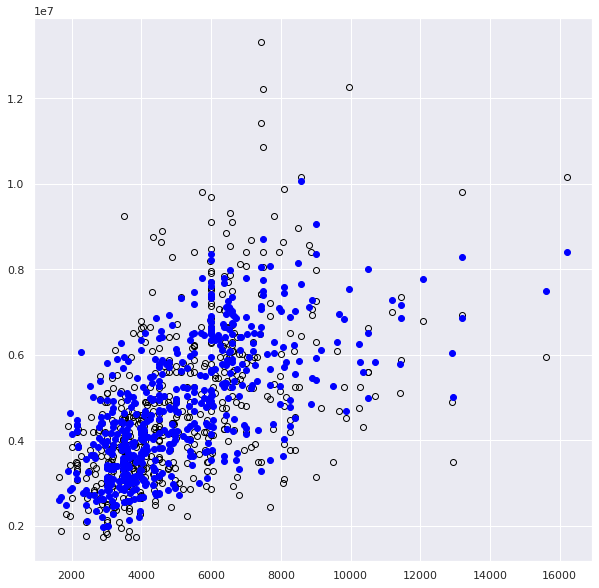

In [33]:
y_prd = pred['mean'][0:544]
plt.figure(num = 1, figsize=(10,10))
plt.plot(X['area'][0:544], Y[0:544], linestyle = "None", marker = "o",markerfacecolor = "None", color = "black",label = "actual")
plt.plot(X['area'][0:544], y_prd[0:544], linestyle = "None", color = "blue",  marker = "o",label = "Prediction ")

We notice from the summary table that our model achieves  R-squared = 0.679 and Adj. R-squared = 0.666. Also the F-statistic = 50.21 with pvalue < 0.05 that means we reject the null hypothesis  $ b_{1} =b_{2} =...=b_{22} = 0$ , so at least one variable's coefficient is different from zero . Many coefficients appears big p-values ( over 0.005)  so we can't reject the null hypothesis that $b_{i}= 0$ for each variable for example we see the p-value of bedrooms_2's coefficient equals to 0.874. In this case  these variables need to be removed from the analysis but before we do this we will check if the main regression analysis assumptions are satisfied.

Linearity

We create again the scatterplot between area and price.

<AxesSubplot:xlabel='area', ylabel='price'>

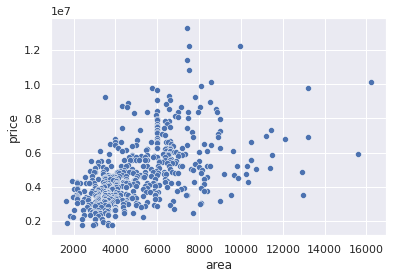

In [34]:
sns.scatterplot(data=data, x="area", y="price")

it doesn't appear problem with the linearity

Homoskedasticity

From the scatterplot between area and price , we observe that,  as the area is being  increased   the variability of price  will be increased too. So we have heteroscedasticity problem , the variance of the residual term in a regression model varies widely.

In [35]:
# You can use model.resid to take the regular residuals or you can calculate them
residuals = Y.values - pred['mean'].values
residuals

array([ 5.24900050e+06,  4.71418191e+06,  4.81335968e+06,  4.76957872e+06,
        2.15306223e+06,  8.15156482e+04,  1.74589066e+06,  2.42174220e+06,
        2.01082127e+06,  1.51927061e+06,  1.31940859e+06,  2.24871940e+06,
        3.29604074e+06,  3.20876385e+06,  3.94962040e+06,  1.75806575e+06,
        8.12926717e+05,  2.48280670e+06,  1.90890677e+06,  3.24089133e+06,
        2.01472248e+06,  2.46629977e+06,  2.09888550e+06,  1.46284104e+06,
        5.70006905e+05,  2.49028497e+05,  3.55588449e+06,  1.30313608e+06,
        1.21260502e+06,  9.11464215e+05,  1.52339027e+06,  1.59949530e+06,
        1.37600344e+06,  1.69353740e+06,  2.87303552e+05,  2.91067660e+05,
       -3.69441731e+05,  1.42616256e+06,  5.20323039e+05,  1.78328664e+06,
        1.71664185e+05,  4.45910648e+05,  9.28229274e+05,  1.42605925e+05,
        1.22558520e+06,  1.92162095e+05,  5.42206039e+05,  2.51490791e+06,
        2.72765190e+05,  3.60353469e+05,  1.31691605e+06, -3.52051551e+05,
        1.99860950e+04,  

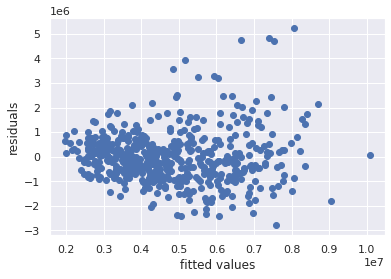

In [36]:
plt.scatter(pred['mean'].values, residuals)
plt.xlabel("fitted values")
plt.ylabel("residuals")

plt.show()

From the scatterplot between fitted values and regular residuals , we observe that  the residuals are not randomly distributed around zero but they show some kind of dependence with the fitted values, so we have heteroscedasticity problem.

Normality of residuals

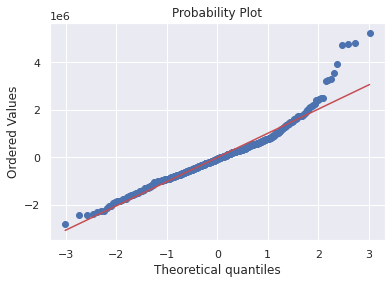

In [37]:
fig = plt.figure()
res = stats.probplot(residuals, plot=plt)

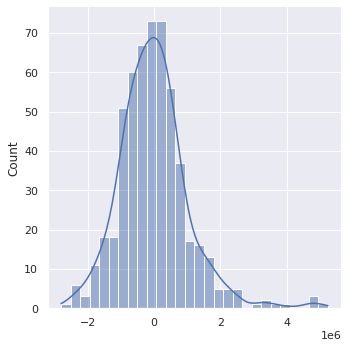

In [38]:
sns.displot(residuals,kde=True)

We see that in the right side we have some problems with residuals' normallity

Independence of errors

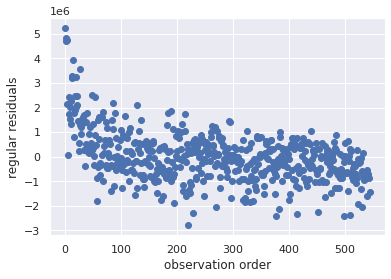

In [39]:
plt.scatter(np.linspace(start = 0 , stop = len(model.resid), num = len(model.resid)), model.resid)
plt.xlabel("observation order")
plt.ylabel("regular residuals")
plt.show()

We plot the residuals in the order in which the observations appear and from the scatterplot above we see that the residuals are not independent. Notice that there is some relationship between the residuals in the data series which could be due, for example to some temporal dependence of the observations. The time dependence of the observations is normal as we studied house prices but we do not know the time intervals when these prices were recorded.

Multicollinearity

In [40]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

               feature         VIF
0                const  279.856119
1                 area    1.396164
2           bedrooms_2   52.299475
3           bedrooms_3   69.492228
4           bedrooms_4   41.264142
5           bedrooms_5    6.140535
6           bedrooms_6    2.033672
7          bathrooms_2    1.313034
8          bathrooms_3    1.102847
9            stories_2    1.725537
10           stories_3    1.379499
11           stories_4    1.524341
12          mainroad_1    1.200791
13         guestroom_1    1.225674
14          basement_1    1.371175
15   hotwaterheating_1    1.075826
16   airconditioning_1    1.246577
17           parking_1    1.208616
18           parking_2    1.306824
19           parking_3    1.071009
20          prefarea_1    1.206845
21  furnishingstatus_1    1.621973
22  furnishingstatus_2    1.700584


VIF bedrooms_2 > 5 

VIF bedrooms_3 > 5 

VIF bedrooms_4 > 5 

First, we will try to solve the heteroscedasticity problem with a log transformation of the variables area and price and drope some variables who show big pvalue.

OLS statsmodel regression

In [41]:
df

,price,area,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bathrooms_2,bathrooms_3,stories_2,...,guestroom_1,basement_1,hotwaterheating_1,airconditioning_1,parking_1,parking_2,parking_3,prefarea_1,furnishingstatus_1,furnishingstatus_2
0,13300000,7420,0,0,1,0,0,1,0,0,...,0,0,0,1,0,1,0,1,0,0
2,12250000,9960,0,1,0,0,0,1,0,1,...,0,1,0,0,0,1,0,1,1,0
3,12215000,7500,0,0,1,0,0,1,0,1,...,0,1,0,1,0,0,1,1,0,0
4,11410000,7420,0,0,1,0,0,0,0,1,...,1,1,0,1,0,1,0,0,0,0
5,10850000,7500,0,1,0,0,0,0,1,0,...,0,1,0,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
541,1767150,2400,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
542,1750000,3620,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
543,1750000,2910,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
Y = np.log(df.price)
X = df.drop(columns='price',axis=1)
X['area']=np.log(X['area'])
X = sm.add_constant(X)
print(Y)
print(X)

X = X.drop(columns =['bedrooms_2','bedrooms_3','bedrooms_4','bedrooms_5','bedrooms_6','parking_3','furnishingstatus_1'],axis=1)

0      16.403275
2      16.321036
3      16.318175
4      16.250001
5      16.199676
         ...    
540    14.414347
541    14.384879
542    14.375126
543    14.375126
544    14.375126
Name: price, Length: 544, dtype: float64
     const      area  bedrooms_2  bedrooms_3  bedrooms_4  bedrooms_5  \
0      1.0  8.911934           0           0           1           0   
2      1.0  9.206332           0           1           0           0   
3      1.0  8.922658           0           0           1           0   
4      1.0  8.911934           0           0           1           0   
5      1.0  8.922658           0           1           0           0   
..     ...       ...         ...         ...         ...         ...   
540    1.0  8.006368           1           0           0           0   
541    1.0  7.783224           0           1           0           0   
542    1.0  8.194229           1           0           0           0   
543    1.0  7.975908           0           1        

In [43]:
X

,const,area,bathrooms_2,bathrooms_3,stories_2,stories_3,stories_4,mainroad_1,guestroom_1,basement_1,hotwaterheating_1,airconditioning_1,parking_1,parking_2,prefarea_1,furnishingstatus_2
0,1.0,8.911934,1,0,0,1,0,1,0,0,0,1,0,1,1,0
2,1.0,9.206332,1,0,1,0,0,1,0,1,0,0,0,1,1,0
3,1.0,8.922658,1,0,1,0,0,1,0,1,0,1,0,0,1,0
4,1.0,8.911934,0,0,1,0,0,1,1,1,0,1,0,1,0,0
5,1.0,8.922658,0,1,0,0,0,1,0,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1.0,8.006368,0,0,0,0,0,1,0,1,0,0,0,1,0,1
541,1.0,7.783224,0,0,0,0,0,0,0,0,0,0,0,0,0,0
542,1.0,8.194229,0,0,0,0,0,1,0,0,0,0,0,0,0,1
543,1.0,7.975908,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [44]:
Y

0      16.403275
2      16.321036
3      16.318175
4      16.250001
5      16.199676
         ...    
540    14.414347
541    14.384879
542    14.375126
543    14.375126
544    14.375126
Name: price, Length: 544, dtype: float64

In [45]:
mod = sm.OLS(Y,X).fit()



print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     84.76
Date:                Mon, 24 Apr 2023   Prob (F-statistic):          9.06e-130
Time:                        04:43:07   Log-Likelihood:                 103.04
No. Observations:                 544   AIC:                            -174.1
Df Residuals:                     528   BIC:                            -105.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 12.4409      0

We notice from the summary table that our model achieves  R-squared = 0.707
and Adj. R-squared = 0.698. Also the F-statistic = 84.76 with pvalue < 0.05 thats means we reject the null hypothesis  $ b_{1} =b_{2} =...=b_{14} = 0$ , so at least one variable's coefficient is different from zero . Only the guestroom_1  coefficient has big p-value ( over 0.005)  so we can't reject the null hypothesis that $b_{guestroom_1}= 0$ . In this case it needs to remove this variable guestroom_1  from the analysis.

In [46]:
X = X.drop(columns =['guestroom_1'],axis=1)

In [47]:
mod = sm.OLS(Y,X, data=df).fit()



print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     90.05
Date:                Mon, 24 Apr 2023   Prob (F-statistic):          6.22e-130
Time:                        04:44:43   Log-Likelihood:                 101.06
No. Observations:                 544   AIC:                            -172.1
Df Residuals:                     529   BIC:                            -107.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 12.3952      0

/home/dimitris/.local/lib/python3.10/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['data']
  warnings.warn(msg, ValueWarning)


We notice from the summary table that our model achieves  R-squared = 0.704
 and Adj. R-squared = 0.697. Also the F-statistic = 84.76 with pvalue < 0.05 thats means we reject the null hypothesis  $ b_{1} =b_{2} =...=b_{13} = 0$ , so at least one variable's coefficient is different from zero . All p values of t-test are low and the value of R-squared isn't differ significantly from the first model.

In [48]:
pr = mod.get_prediction(sm.add_constant(X))
pred = pr.summary_frame(alpha=0.05)
pred

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,15.989653,0.042257,15.906640,16.072665,15.580828,16.398477
2,15.908892,0.035951,15.838267,15.979516,15.502402,16.315381
3,15.875045,0.032077,15.812030,15.938059,15.469808,16.280282
4,15.680244,0.031920,15.617538,15.742949,15.275055,16.085432
5,16.066348,0.071008,15.926856,16.205840,15.642432,16.490263
...,...,...,...,...,...,...
540,15.026714,0.034285,14.959362,15.094066,14.620780,15.432648
541,14.768450,0.030406,14.708719,14.828180,14.363711,15.173189
542,14.857664,0.021529,14.815371,14.899957,14.455129,15.260199
543,14.827203,0.029226,14.769789,14.884617,14.422799,15.231607


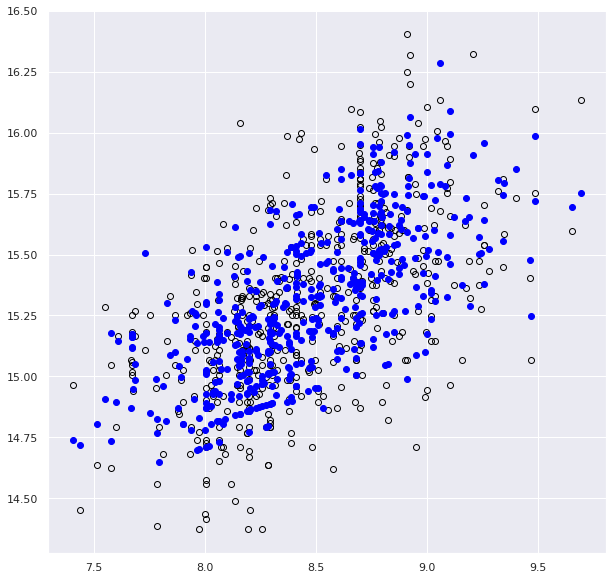

In [49]:
y_prd = pred['mean'][0:544]
plt.figure(num = 1, figsize=(10,10))
plt.plot(X['area'][0:544], Y[0:544], linestyle = "None", marker = "o",markerfacecolor = "None", color = "black",label = "actual")
plt.plot(X['area'][0:544], y_prd[0:544], linestyle = "None", color = "blue",  marker = "o",label = "Prediction ")

From above plot seems that we solved the heteroscedasticity problem. 

Regression analysis assumptions:

Linearity

We create again the scatterplot between area and price. 

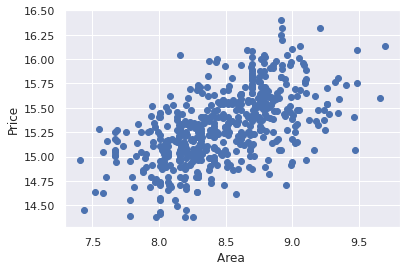

In [50]:
plt.scatter(X['area'],Y)
plt.xlabel("Area ")
plt.ylabel("Price")
plt.show()

Homoscedasticity

In [51]:
residuals = Y.values - pred['mean'].values


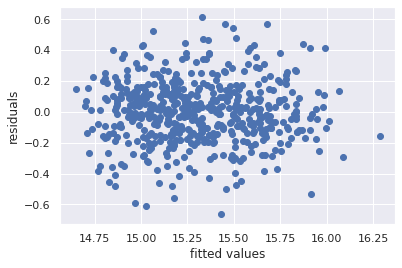

In [52]:
plt.scatter(pred['mean'].values, residuals)
plt.xlabel("fitted values")
plt.ylabel("residuals")

plt.show()

Any non-random patterns in the scatterplots and we accept the assumption of homoscedasticity.

Normality of residuals

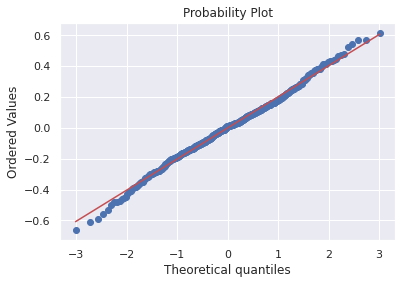

In [53]:
fig = plt.figure()
res = stats.probplot(residuals, plot=plt)

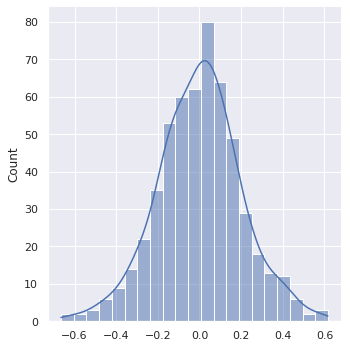

In [54]:
sns.displot(residuals,kde=True)

The histogram and Q-Q plot indicate that the residuals may be from a normal
distribution.

Residual Normality Testing:
H_0 : residuals follow a normal distribution
H_1 : residuals do not follow a normal distribution

In [55]:
#Shapiro-Wilk Test
print(stats.shapiro(x = mod.resid))
print('-----------------------------')
# Kolmogorov-Smirnov Test
print('Kolmogorov-Smirnov Test',statsmodels.stats.diagnostic.kstest_normal(x = mod.resid, dist = "norm")) #statistic and p-value

ShapiroResult(statistic=0.9954663515090942, pvalue=0.11469794809818268)
-----------------------------
Kolmogorov-Smirnov Test (0.031219492263623194, 0.2942126908440562)


Independence of errors

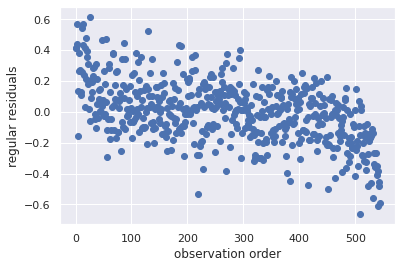

In [56]:
plt.scatter(np.linspace(start = 0 , stop = len(model.resid), num = len(model.resid)), mod.resid)
plt.xlabel("observation order")
plt.ylabel("regular residuals")
plt.show()

In [57]:
# Durbin–Watson Test
print(durbin_watson(mod.resid))

1.3214132760844315


An acceptable range is 1.50 - 2.50 so the errors aren't independent 

So far we have not dealt with the outliers or influence observation of our model, nor have we removed any of them. 

In [58]:
influence = mod.get_influence()
infl_data=influence.summary_frame()

infl_data

# we have dropped the observation data['bathrooms']==4  in the start of the notebook , so is missing!!!!!!! 


,dfb_const,dfb_area,dfb_bathrooms_2,dfb_bathrooms_3,dfb_stories_2,dfb_stories_3,dfb_stories_4,dfb_mainroad_1,dfb_basement_1,dfb_hotwaterheating_1,...,dfb_parking_1,dfb_parking_2,dfb_prefarea_1,dfb_furnishingstatus_2,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.019039,0.018649,0.122316,-0.001059,-0.006209,0.259032,-0.074386,-0.045581,-0.092028,-0.048491,...,-0.000333,0.158367,0.098101,-0.024922,0.012897,2.074902,0.043003,0.439838,2.081427,0.441221
2,-0.151054,0.147399,0.125791,-0.048164,0.116284,0.006842,-0.007951,-0.056091,0.055798,-0.048720,...,-0.038124,0.131194,0.107456,0.000923,0.009043,2.054781,0.031126,0.368292,2.061079,0.369421
3,-0.096299,0.091256,0.138424,-0.005894,0.085487,-0.057351,-0.071675,-0.003689,0.042316,0.006703,...,-0.120170,-0.135695,0.127709,-0.019093,0.008214,2.202062,0.024780,0.351015,2.210132,0.352301
4,-0.129680,0.120932,-0.156786,-0.083185,0.170406,0.054403,0.007284,-0.021262,0.169155,-0.025551,...,-0.015433,0.201331,-0.154218,-0.024864,0.013440,2.830959,0.024537,0.448991,2.849952,0.452004
5,0.017535,-0.017560,-0.001916,0.234190,-0.061116,-0.027567,-0.038395,0.005090,0.010302,-0.004435,...,0.006693,0.024539,0.046118,-0.015916,0.004490,0.698041,0.121426,0.259506,0.697703,0.259380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,-0.198637,0.209292,0.040565,0.031624,0.129383,-0.008551,-0.014288,-0.098732,-0.223552,0.049099,...,-0.088258,-0.328191,0.106448,-0.199732,0.018050,-3.048574,0.028308,-0.520342,-3.072804,-0.524478
541,-0.126686,0.090428,0.006530,-0.002699,0.106880,0.044086,0.015326,0.168207,0.059177,0.016531,...,0.031803,0.004103,-0.018694,0.117691,0.005501,-1.903638,0.022264,-0.287260,-1.908386,-0.287977
542,-0.055667,0.053125,-0.015198,-0.009276,0.103923,0.065496,0.053978,-0.097261,0.058813,0.006407,...,0.047448,0.044952,0.029136,-0.115028,0.004267,-2.381320,0.011162,-0.253003,-2.391923,-0.254130
543,-0.094171,0.050940,0.012513,0.002614,0.116061,0.048750,0.020392,0.212390,0.068927,0.019379,...,0.047354,0.015283,-0.014159,0.134649,0.007036,-2.241684,0.020571,-0.324872,-2.250278,-0.326117


The above dataframe contains the basic information that we need to know how to  indicate outliers, leverage points and influence points.

column  cooks_d : cook distance

column  standard_resid : Standardized residuals 

column  hat_diag : leverage $(h_{ii})$

column  dffits : dffits measure for influence of an observation

In [60]:
infl = pd.DataFrame(columns=[ 'cooks_d', 'standard_resid', 'leverage', 'student_resid','dffits'])
infl['cooks_d'] =infl_data['cooks_d']
infl['standard_resid'] =infl_data['standard_resid']
infl['leverage'] = infl_data['hat_diag']
infl['student_resid'] =infl_data['student_resid']
infl['dffits'] =infl_data['dffits']
print(infl['standard_resid'].describe())
infl


count    544.000000
mean      -0.000085
std        1.002055
min       -3.300928
25%       -0.640928
50%        0.055727
75%        0.620484
max        3.055924
Name: standard_resid, dtype: float64


,cooks_d,standard_resid,leverage,student_resid,dffits
0,0.012897,2.074902,0.043003,2.081427,0.441221
2,0.009043,2.054781,0.031126,2.061079,0.369421
3,0.008214,2.202062,0.024780,2.210132,0.352301
4,0.013440,2.830959,0.024537,2.849952,0.452004
5,0.004490,0.698041,0.121426,0.697703,0.259380
...,...,...,...,...,...
540,0.018050,-3.048574,0.028308,-3.072804,-0.524478
541,0.005501,-1.903638,0.022264,-1.908386,-0.287977
542,0.004267,-2.381320,0.011162,-2.391923,-0.254130
543,0.007036,-2.241684,0.020571,-2.250278,-0.326117


Normality of standardized residuals

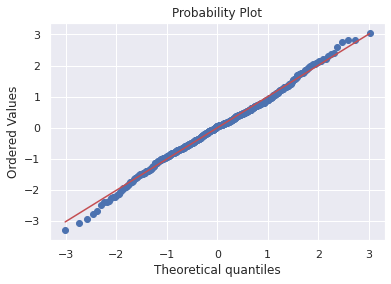

In [61]:
fig = plt.figure()
res = stats.probplot(infl['standard_resid'], plot=plt)

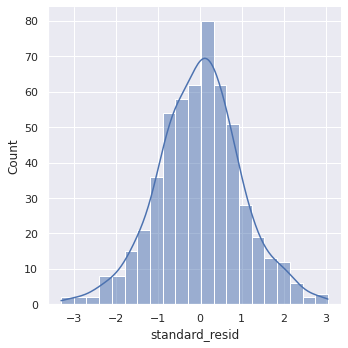

In [62]:
sns.displot(infl['standard_resid'],kde=True)

The histogram and Q-Q plot indicate that the residuals  do not violate the normality assumption.

Homoscedasticity

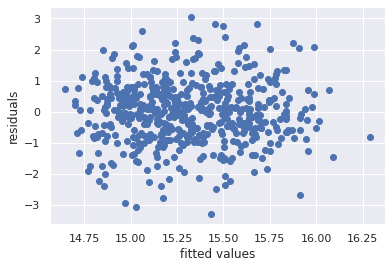

In [63]:
plt.scatter(pred['mean'].values, infl['standard_resid'])
plt.xlabel("fitted values")
plt.ylabel("residuals")

plt.show()

Any non-random patterns in the scatterplots and we accept the assumption of homoscedasticity.

Leverage points 


We consider that an observation is leverage point if $h_{ii} > 2p/n$ , whete p is  the number of predictors. In our case , p = 14 .

In [64]:
leverage_threshold = 2*14 / 544
leverage_threshold

0.051470588235294115

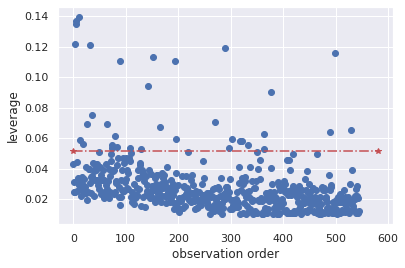

In [65]:
plt.scatter(np.linspace(start = 0 , stop = len(infl['leverage'] ), num = len(infl['leverage'] )), infl['leverage'] )
plt.plot((0, 580), (leverage_threshold, leverage_threshold), '-.r*')
plt.xlabel("observation order")
plt.ylabel("leverage")
plt.show()

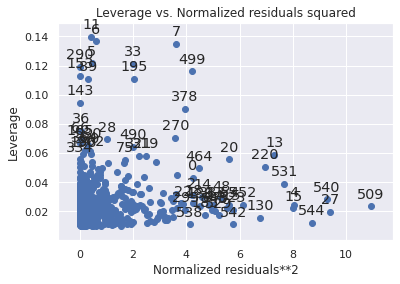

In [66]:
plot_leverage_resid2(mod)
plt.show()

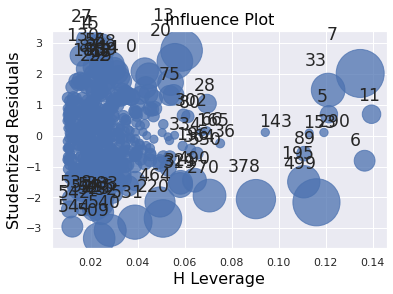

In [67]:
influence_plot(mod)
plt.show()

In [68]:
leverage_points = infl[(infl['leverage']>leverage_threshold)]

print(leverage_points.shape)
print("\n")
leverage_points

(35, 5)




,cooks_d,standard_resid,leverage,student_resid,dffits
5,4.489559e-03,0.698041,0.121426,0.697703,0.259380
6,6.964434e-03,-0.812536,0.136614,-0.812275,-0.323109
7,4.210089e-02,2.013911,0.134727,2.019764,0.796988
11,5.256464e-03,0.697234,0.139556,0.696895,0.280660
13,3.139293e-02,2.748258,0.058687,2.765473,0.690515
20,2.274498e-02,2.401921,0.055835,2.412843,0.586758
28,5.383326e-03,1.039815,0.069494,1.039895,0.284187
33,2.008602e-02,1.478838,0.121085,1.480503,0.549517
36,3.353285e-04,-0.248885,0.075103,-0.248664,-0.070859
66,1.196690e-04,0.155112,0.069428,0.154968,0.042329


In [69]:
leverage_points.describe()

,cooks_d,standard_resid,leverage,student_resid,dffits
count,3.500000e+01,35.000000,35.000000,35.000000,35.000000
mean,8.978842e-03,0.005207,0.079835,0.005632,-0.001610
std,1.169465e-02,1.259742,0.029303,1.263096,0.373288
min,8.028445e-07,-2.152811,0.052906,-2.160259,-0.782961
25%,4.010633e-04,-0.753909,0.056959,-0.753608,-0.226101
50%,4.489559e-03,0.014287,0.065312,0.014273,0.003467
75%,1.086795e-02,0.697638,0.110756,0.697299,0.270020
max,4.210089e-02,2.748258,0.139556,2.765473,0.796988


Influential_observations

Influential observation is defined as the one whose deletion has a large effect on the parameters estimations.We consider that an observation is influential_observations if cooks_d > 4/n and  dffits > $2 * (p / n)^{1/2}$ .

In [70]:
cook_threshold=4/544

In [71]:
cook_threshold

0.007352941176470588

In [72]:
dffits_threshold = 2 * math.sqrt(14 / 544)

In [73]:
dffits_threshold

0.3208444739598739

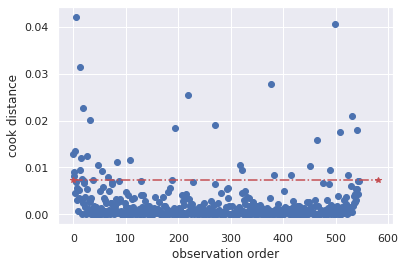

In [74]:
plt.scatter(np.linspace(start = 0 , stop = len(infl['cooks_d'] ), num = len(infl['cooks_d'] )), infl['cooks_d'] )
plt.plot((0, 580), (cook_threshold, cook_threshold), '-.r*')
plt.xlabel("observation order")
plt.ylabel("cook distance")
plt.show()

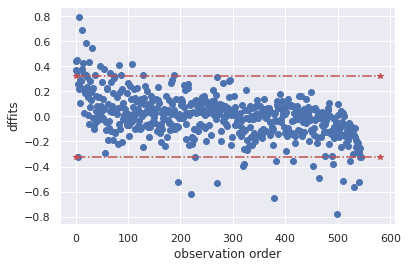

In [75]:
plt.scatter(np.linspace(start = 0 , stop = len(infl['dffits'] ), num = len(infl['dffits'] )), infl['dffits'] )
plt.plot((0, 580), (dffits_threshold, dffits_threshold), '-.r*')
plt.plot((0, 580), (-dffits_threshold, -dffits_threshold), '-.r*')
plt.xlabel("observation order")
plt.ylabel("dffits")
plt.show()

In [76]:
influential_observations = infl[(infl['cooks_d']>cook_threshold) & (abs(infl['dffits']) > dffits_threshold)]

In [77]:
print(influential_observations.shape)
print("\n")
influential_observations

(34, 5)




,cooks_d,standard_resid,leverage,student_resid,dffits
0,0.012897,2.074902,0.043003,2.081427,0.441221
2,0.009043,2.054781,0.031126,2.061079,0.369421
3,0.008214,2.202062,0.024780,2.210132,0.352301
4,0.013440,2.830959,0.024537,2.849952,0.452004
7,0.042101,2.013911,0.134727,2.019764,0.796988
13,0.031393,2.748258,0.058687,2.765473,0.690515
14,0.009482,2.147602,0.029916,2.154986,0.378433
15,0.012088,2.822992,0.022246,2.841810,0.428655
18,0.007540,2.063748,0.025869,2.070147,0.337355
20,0.022745,2.401921,0.055835,2.412843,0.586758


In [78]:
influential_observations.describe()

,cooks_d,standard_resid,leverage,student_resid,dffits
count,34.000000,34.000000,34.000000,34.000000,34.000000
mean,0.015541,0.121102,0.049166,0.121205,0.008269
std,0.009038,2.296014,0.031517,2.307219,0.492019
min,0.007433,-3.300928,0.019692,-3.332303,-0.782961
25%,0.009360,-2.150350,0.024736,-2.157768,-0.467374
50%,0.011872,1.522700,0.040907,1.524614,0.335866
75%,0.018884,2.129427,0.058220,2.136596,0.417286
max,0.042101,3.055924,0.134727,3.080345,0.796988


We consider that an observation is outlier  point if the observation is leverage point and the same time  IS NOT influential_observation.

$h_{ii}$ > leverage_threshold 

cooks_d < cooks_d_threshold 

dffits < dffits_threshold

In [79]:
outliers = infl[(infl['cooks_d'] < cook_threshold)&(infl['leverage']>leverage_threshold)&(abs(infl['dffits'])< dffits_threshold )]

In [80]:
outliers

,cooks_d,standard_resid,leverage,student_resid,dffits
5,4.489559e-03,0.698041,0.121426,0.697703,0.259380
11,5.256464e-03,0.697234,0.139556,0.696895,0.280660
28,5.383326e-03,1.039815,0.069494,1.039895,0.284187
36,3.353285e-04,-0.248885,0.075103,-0.248664,-0.070859
66,1.196690e-04,0.155112,0.069428,0.154968,0.042329
74,6.403886e-03,1.303212,0.053532,1.304075,0.310138
75,6.842422e-03,1.324617,0.055263,1.325564,0.320598
80,1.693546e-03,0.623384,0.061359,0.623023,0.159292
89,2.834888e-03,-0.584190,0.110795,-0.583826,-0.206083
109,9.159583e-05,-0.155787,0.053578,-0.155643,-0.037032


In [81]:
outliers.shape

(22, 5)

In [82]:
outliers.index

Int64Index([  5,  11,  28,  36,  66,  74,  75,  80,  89, 109, 129, 143, 153,
            165, 196, 290, 298, 302, 334, 363, 364, 530],
           dtype='int64')

In [83]:
df1=df.drop(index=[  5,  11,  28,  36,  66,  74,  75,  80,  89, 109, 129, 143, 153,
            165, 196, 290, 298, 302, 334, 363, 364, 530],axis=0)
df1

,price,area,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bathrooms_2,bathrooms_3,stories_2,...,guestroom_1,basement_1,hotwaterheating_1,airconditioning_1,parking_1,parking_2,parking_3,prefarea_1,furnishingstatus_1,furnishingstatus_2
0,13300000,7420,0,0,1,0,0,1,0,0,...,0,0,0,1,0,1,0,1,0,0
2,12250000,9960,0,1,0,0,0,1,0,1,...,0,1,0,0,0,1,0,1,1,0
3,12215000,7500,0,0,1,0,0,1,0,1,...,0,1,0,1,0,0,1,1,0,0
4,11410000,7420,0,0,1,0,0,0,0,1,...,1,1,0,1,0,1,0,0,0,0
6,10150000,8580,0,0,1,0,0,0,1,0,...,0,0,0,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
541,1767150,2400,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
542,1750000,3620,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
543,1750000,2910,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
# Now we have 522 observations 

In [85]:
y = np.log(df1['price'])
x = df1.drop(columns='price',axis=1)
x['area']=np.log(x['area'])
x = sm.add_constant(x)
x = x.drop(columns =['bedrooms_2','bedrooms_3','bedrooms_4','bedrooms_5','bedrooms_6','parking_3','furnishingstatus_1'],axis=1)
print(y)
print(x)

0      16.403275
2      16.321036
3      16.318175
4      16.250001
6      16.132984
         ...    
540    14.414347
541    14.384879
542    14.375126
543    14.375126
544    14.375126
Name: price, Length: 522, dtype: float64
     const      area  bathrooms_2  bathrooms_3  stories_2  stories_3  \
0      1.0  8.911934            1            0          0          1   
2      1.0  9.206332            1            0          1          0   
3      1.0  8.922658            1            0          1          0   
4      1.0  8.911934            0            0          1          0   
6      1.0  9.057189            0            1          0          0   
..     ...       ...          ...          ...        ...        ...   
540    1.0  8.006368            0            0          0          0   
541    1.0  7.783224            0            0          0          0   
542    1.0  8.194229            0            0          0          0   
543    1.0  7.975908            0            0      

Text(0, 0.5, 'y ')

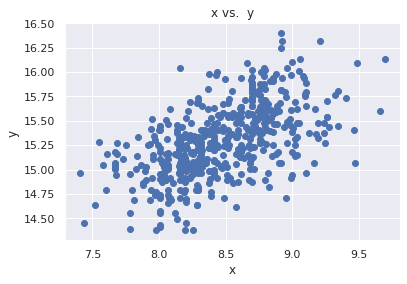

In [86]:
plt.scatter(x['area'], y)
plt.title('x vs.  y')
plt.xlabel('x')
plt.ylabel('y ')

In [87]:
mod2 = sm.OLS(y,x, data=df1).fit()



print(mod2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     77.32
Date:                Mon, 24 Apr 2023   Prob (F-statistic):          2.85e-120
Time:                        05:00:20   Log-Likelihood:                 93.265
No. Observations:                 522   AIC:                            -154.5
Df Residuals:                     506   BIC:                            -86.41
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 12.4358      0

/home/dimitris/.local/lib/python3.10/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['data']
  warnings.warn(msg, ValueWarning)


In [88]:
x = x.drop(columns =['hotwaterheating_1'],axis=1)
x = x.drop(columns =['guestroom_1'],axis=1)


In [89]:
mod3 = sm.OLS(y,x, data=df1).fit()



print(mod3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     88.08
Date:                Mon, 24 Apr 2023   Prob (F-statistic):          5.90e-121
Time:                        05:00:42   Log-Likelihood:                 90.234
No. Observations:                 522   AIC:                            -152.5
Df Residuals:                     508   BIC:                            -92.86
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 12.4134      0

/home/dimitris/.local/lib/python3.10/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['data']
  warnings.warn(msg, ValueWarning)


0ur last model contains 13 predictors (Df Model: 13 ) and No. Observations: 522. Also achieves R-squared:0.693  , Adj. R-squared:0.685 , AIC: -152.5 and BIC:-92.86.
Meanwhile the first model before our analysis contains 22 predictors (Df Model: 22 ) and No. Observations: 544. Also achieves R-squared:0.679  , Adj. R-squared:0.666 , AIC: 1.667e+04 and BIC:1.677e+04.